In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Dataset/pillow_features.csv')

In [3]:
df = df[df['Sales_volume'] != 0]
df = df.dropna()

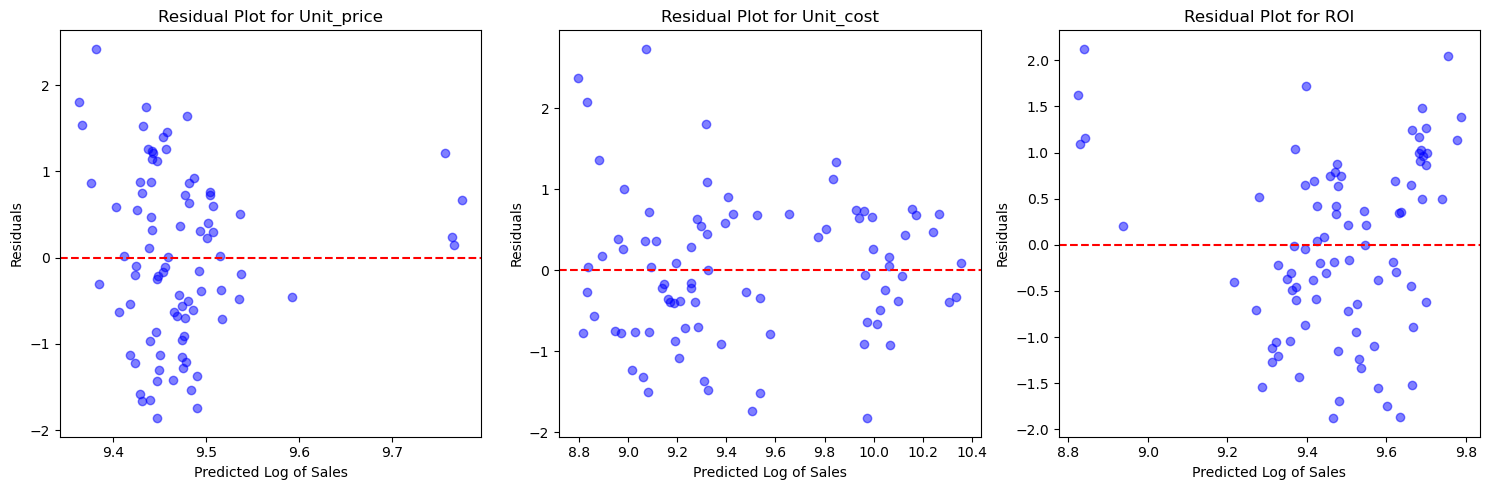

In [4]:
from sklearn.linear_model import LinearRegression

# 假设你的DataFrame为df，特征包括['成本', '售价', 'roi']，目标为'sales_target'
features = ['Unit_price', 'Unit_cost', 'ROI']
target = 'Target'

# 创建图形并设置大小
plt.figure(figsize=(15, 5))

# 检查目标列中是否有非正数值，避免在取对数时出现错误
df[target] = df[target].clip(lower=1)

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    
    # 对目标变量取对数
    log_target = np.log(df[target])
    
    # 拟合线性回归
    X = df[feature].values.reshape(-1, 1)
    y = log_target
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # 计算残差
    residuals = y - y_pred

    # 绘制残差图
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')  # 添加 y=0 参考线

    # 图表标题和标签
    plt.title(f'Residual Plot for {feature}')
    plt.xlabel('Predicted Log of Sales')
    plt.ylabel('Residuals')

# 显示图像
plt.tight_layout()
plt.show()

In [5]:
version1 = df[df['Version'] == 1]
version1['Month'] = pd.date_range(start='2016-09', end = '2018-02',  freq='M').strftime('%Y-%m')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15176\3521662546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  version1['Month'] = pd.date_range(start='2016-09', end = '2018-02',  freq='M').strftime('%Y-%m')


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15176\273059075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  version1['Month'] = pd.date_range(start='2016-09', end = '2018-02',  freq='M').strftime('%Y-%m')


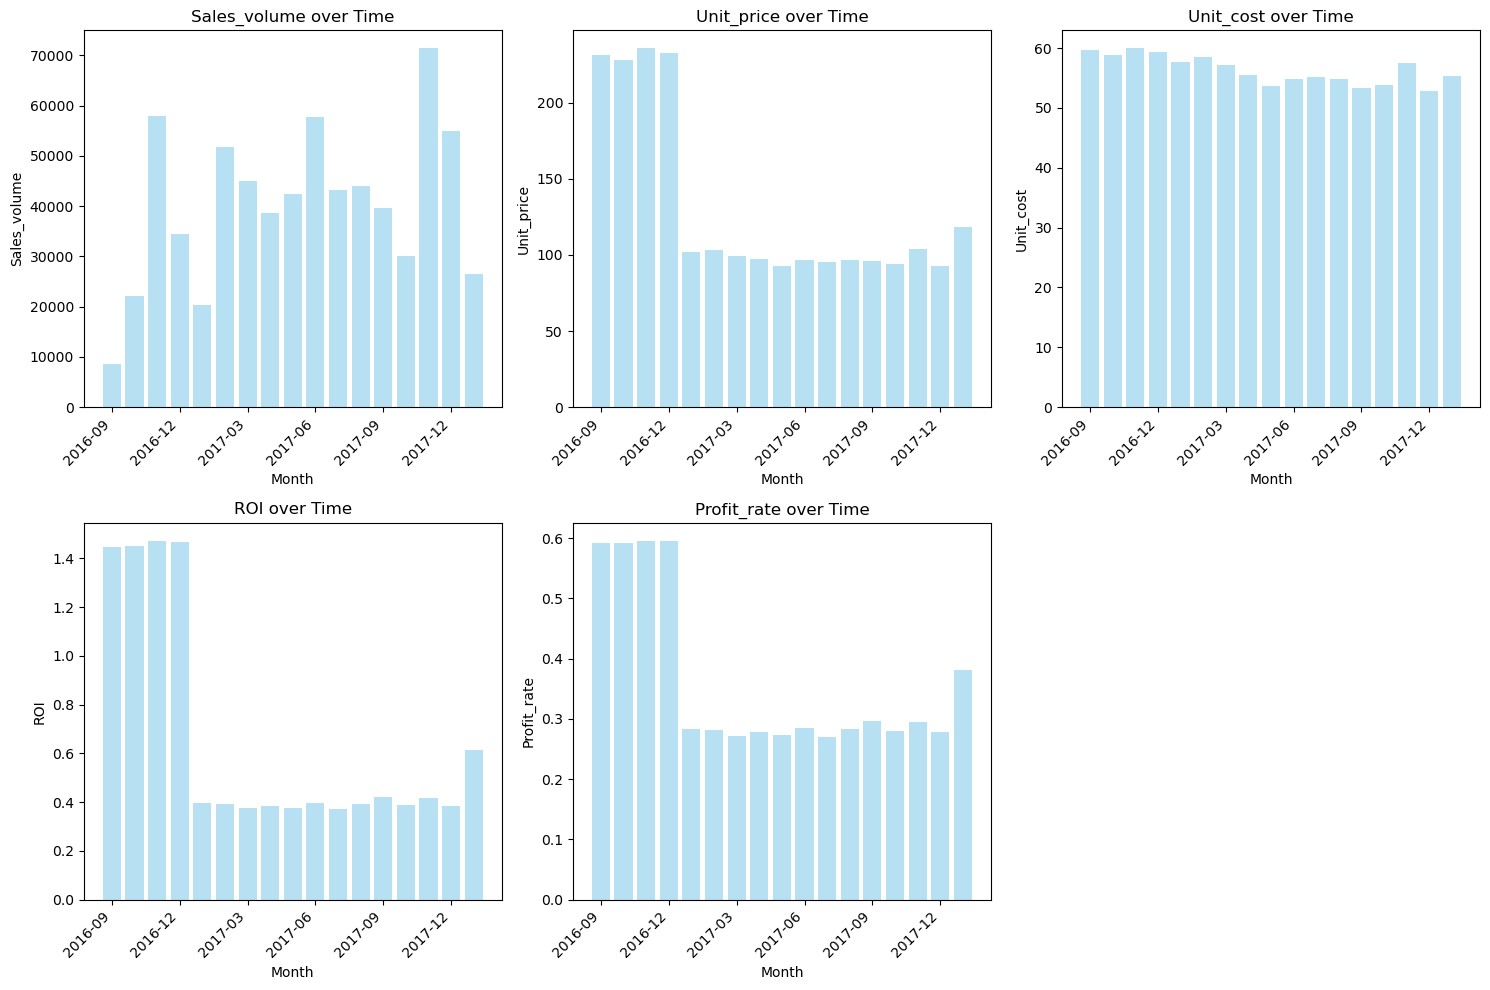

In [6]:
version1 = df[df['Version'] == 1]
version1['Month'] = pd.date_range(start='2016-09', end = '2018-02',  freq='M').strftime('%Y-%m')

dates = version1['Month'].values
# The columns of interest for the user
columns_of_interest = ['Sales_volume','Unit_price','Unit_cost', 'ROI','Profit_rate']

# Creating subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot bar charts for each feature in separate subplots, using 'Month' as x-axis
for idx, column in enumerate(columns_of_interest):
    axes[idx].bar(dates, version1[column],color='skyblue', alpha = 0.6)
    axes[idx].set_ylabel(column)
    axes[idx].set_xlabel('Month')
    axes[idx].set_title(f'{column} over Time')
    
    # 每三个月显示一个日期
    xticks_positions = range(0, len(dates), 3)
    xticks_labels = [dates[i] for i in xticks_positions]
    axes[idx].set_xticks(xticks_positions)
    axes[idx].set_xticklabels(xticks_labels, rotation=45, ha='right')
    
    

# Remove the extra subplot (since we only have 5 features but 6 subplots)
fig.delaxes(axes[-1])

# Final adjustments to layout
plt.tight_layout()
plt.show()

In [7]:
version2 = df[df['Version'] == 2]
version2

,Month,Sales_volume,Revenue,Cost,Promotion_expense,Profit,Version,Unit_price,Unit_cost,ROI,Profit_rate,Target,Time_to_peak,Total_sales
19,2,11393.0,1.411787e+06,642447.74,211767.976575,5.575708e+05,2,123.917011,56.389690,0.652728,0.394940,24579.0,4,252866.0
20,3,24579.0,3.018974e+06,1385720.01,452846.075400,1.180408e+06,2,122.827366,56.378209,0.642026,0.390996,27689.0,4,252866.0
21,4,27689.0,3.137503e+06,1423954.76,470625.432000,1.242923e+06,2,113.312250,51.426731,0.656041,0.396150,31195.0,4,252866.0
22,5,31195.0,3.483733e+06,1555116.23,522559.908525,1.406057e+06,2,111.675997,49.851458,0.676745,0.403606,26911.0,4,252866.0
23,6,26911.0,3.269156e+06,1528719.08,490373.460450,1.250064e+06,2,121.480302,56.806476,0.619122,0.382381,16692.0,4,252866.0
24,7,16692.0,2.031401e+06,921020.98,304710.185925,8.056701e+05,2,121.699092,55.177389,0.657298,0.396608,19901.0,4,252866.0
25,8,19901.0,2.465372e+06,1118475.75,369805.769355,9.770903e+05,2,123.881805,56.201987,0.656522,0.396326,18148.0,4,252866.0
26,9,18148.0,2.230768e+06,1008723.07,334615.213695,8.874298e+05,2,122.920878,55.583154,0.660615,0.397814,28545.0,4,252866.0
27,10,28545.0,3.238344e+06,1388997.89,485751.649170,1.363595e+06,2,113.446990,48.659937,0.727348,0.421078,24687.0,4,252866.0
28,11,24687.0,3.155006e+06,1393609.69,473250.975000,1.288146e+06,2,127.800320,56.451156,0.690006,0.408286,9350.0,4,252866.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15176\1273565655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  version2['Month'] = pd.date_range(start='2018-02', end = '2019-02',  freq='M').strftime('%Y-%m')


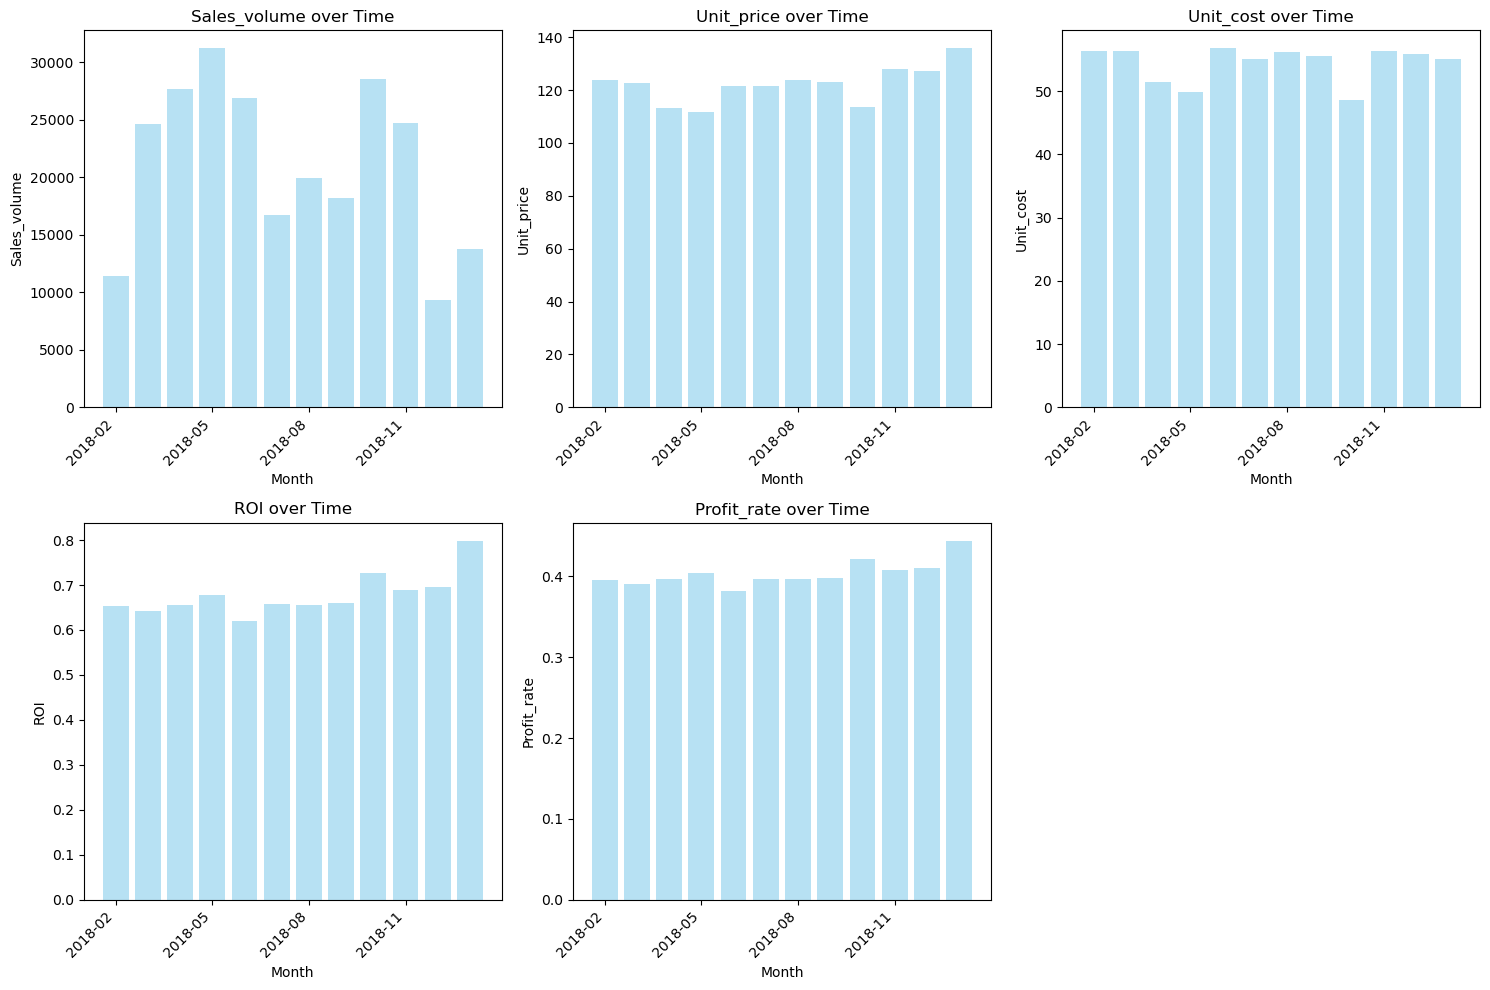

In [8]:
version2 = df[df['Version'] == 2]
version2['Month'] = pd.date_range(start='2018-02', end = '2019-02',  freq='M').strftime('%Y-%m')

dates = version2['Month'].values
# The columns of interest for the user
columns_of_interest = ['Sales_volume','Unit_price','Unit_cost', 'ROI','Profit_rate']

# Creating subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot bar charts for each feature in separate subplots, using 'Month' as x-axis
for idx, column in enumerate(columns_of_interest):
    axes[idx].bar(dates, version2[column],color='skyblue', alpha = 0.6)
    axes[idx].set_ylabel(column)
    axes[idx].set_xlabel('Month')
    axes[idx].set_title(f'{column} over Time')
    
    # 每三个月显示一个日期
    xticks_positions = range(0, len(dates), 3)
    xticks_labels = [dates[i] for i in xticks_positions]
    axes[idx].set_xticks(xticks_positions)
    axes[idx].set_xticklabels(xticks_labels, rotation=45, ha='right')
    
    

# Remove the extra subplot (since we only have 5 features but 6 subplots)
fig.delaxes(axes[-1])

# Final adjustments to layout
plt.tight_layout()
plt.show()


In [9]:
version3 = df[df['Version'] == 3]
version3

,Month,Sales_volume,Revenue,Cost,Promotion_expense,Profit,Version,Unit_price,Unit_cost,ROI,Profit_rate,Target,Time_to_peak,Total_sales
32,2,8528.0,1.164459e+06,475573.01,1.746688e+05,5.142167e+05,3,136.545322,55.766066,0.790808,0.441593,11503.0,6,612542.0
33,3,11503.0,1.564528e+06,655785.07,2.346792e+05,6.740638e+05,3,136.010436,57.009917,0.756980,0.430842,22991.0,6,612542.0
34,4,22991.0,2.656898e+06,1089322.59,3.985347e+05,1.169041e+06,3,115.562515,47.380392,0.785721,0.440002,33190.0,6,612542.0
35,5,33190.0,3.731470e+06,1570674.94,5.597206e+05,1.601075e+06,3,112.427550,47.323740,0.751539,0.429073,67626.0,6,612542.0
36,6,67626.0,4.859027e+06,2998989.64,7.288541e+05,1.131184e+06,3,71.851469,44.346696,0.303442,0.232800,133605.0,6,612542.0
37,7,133605.0,8.550884e+06,5481305.90,1.282633e+06,1.786946e+06,3,64.001229,41.026203,0.264187,0.208978,71023.0,6,612542.0
38,8,71023.0,4.642571e+06,2944223.03,6.963857e+05,1.001963e+06,3,65.367152,41.454501,0.275218,0.215821,54675.0,6,612542.0
39,9,54675.0,3.799821e+06,2298533.51,5.699732e+05,9.313144e+05,3,69.498328,42.039936,0.324669,0.245094,27897.0,6,612542.0
40,10,27897.0,2.242901e+06,1208093.07,3.364351e+05,6.983728e+05,3,80.399362,43.305483,0.452159,0.311370,21755.0,6,612542.0
41,11,21755.0,2.093891e+06,1020205.53,3.140836e+05,7.596017e+05,3,96.248717,46.895221,0.569293,0.362770,20117.0,6,612542.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15176\161734812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  version3['Month'] = pd.date_range(start='2019-02', end = '2021-04',  freq='M').strftime('%Y-%m')


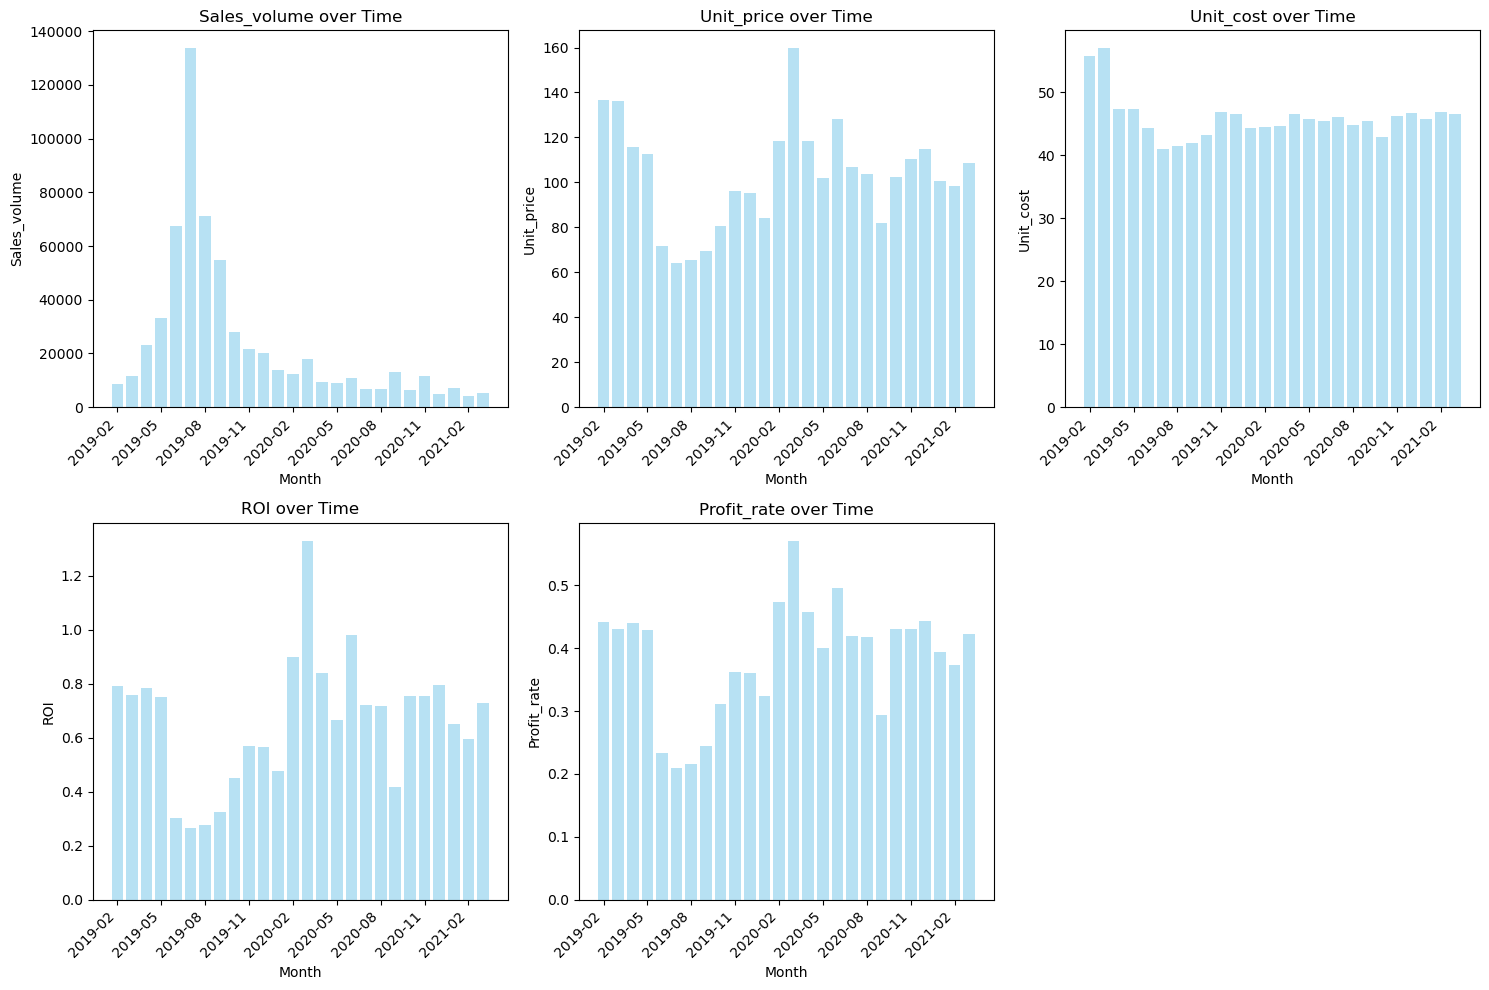

In [10]:
version3 = df[df['Version'] == 3]
version3['Month'] = pd.date_range(start='2019-02', end = '2021-04',  freq='M').strftime('%Y-%m')

dates = version3['Month'].values
# The columns of interest for the user
columns_of_interest = ['Sales_volume','Unit_price','Unit_cost', 'ROI','Profit_rate']

# Creating subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot bar charts for each feature in separate subplots, using 'Month' as x-axis
for idx, column in enumerate(columns_of_interest):
    axes[idx].bar(dates, version3[column],color='skyblue', alpha = 0.6)
    axes[idx].set_ylabel(column)
    axes[idx].set_xlabel('Month')
    axes[idx].set_title(f'{column} over Time')
    
    # 每三个月显示一个日期
    xticks_positions = range(0, len(dates), 3)
    xticks_labels = [dates[i] for i in xticks_positions]
    axes[idx].set_xticks(xticks_positions)
    axes[idx].set_xticklabels(xticks_labels, rotation=45, ha='right')
    
    

# Remove the extra subplot (since we only have 5 features but 6 subplots)
fig.delaxes(axes[-1])

# Final adjustments to layout
plt.tight_layout()
plt.show()


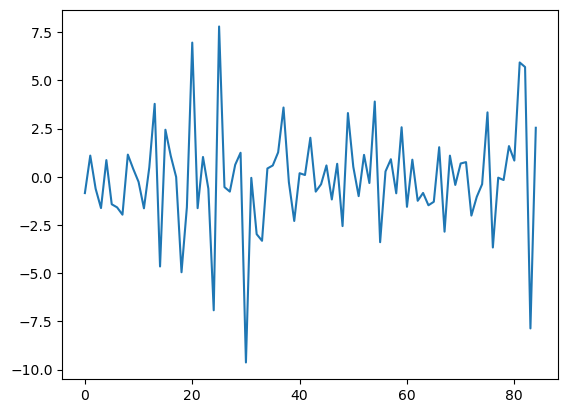

In [11]:
plt.plot(np.diff(df['Unit_cost'].values))

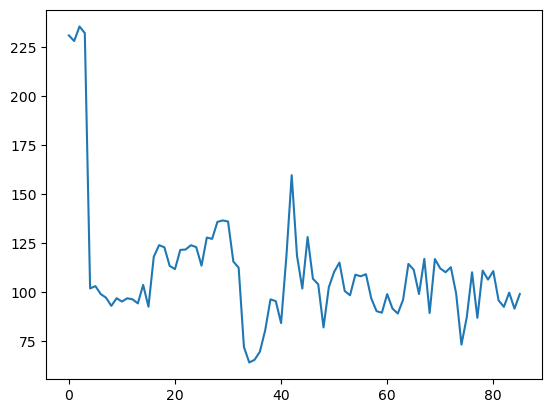

In [12]:
plt.plot(df['Unit_price'].values)

In [18]:
cor_features = ['Unit_price', 'Unit_cost', 'ROI', 'Profit_rate']
df_cor_features = df[cor_features]
# 使用 pd.date_range() 创建从 2016 年 9 月开始，以月份为频率的日期索引
date_index = pd.date_range(start='2016-09', periods=len(df_cor_features), freq='M')

# 将该日期索引赋值给 DataFrame 的 index
df_cor_features.index = date_index

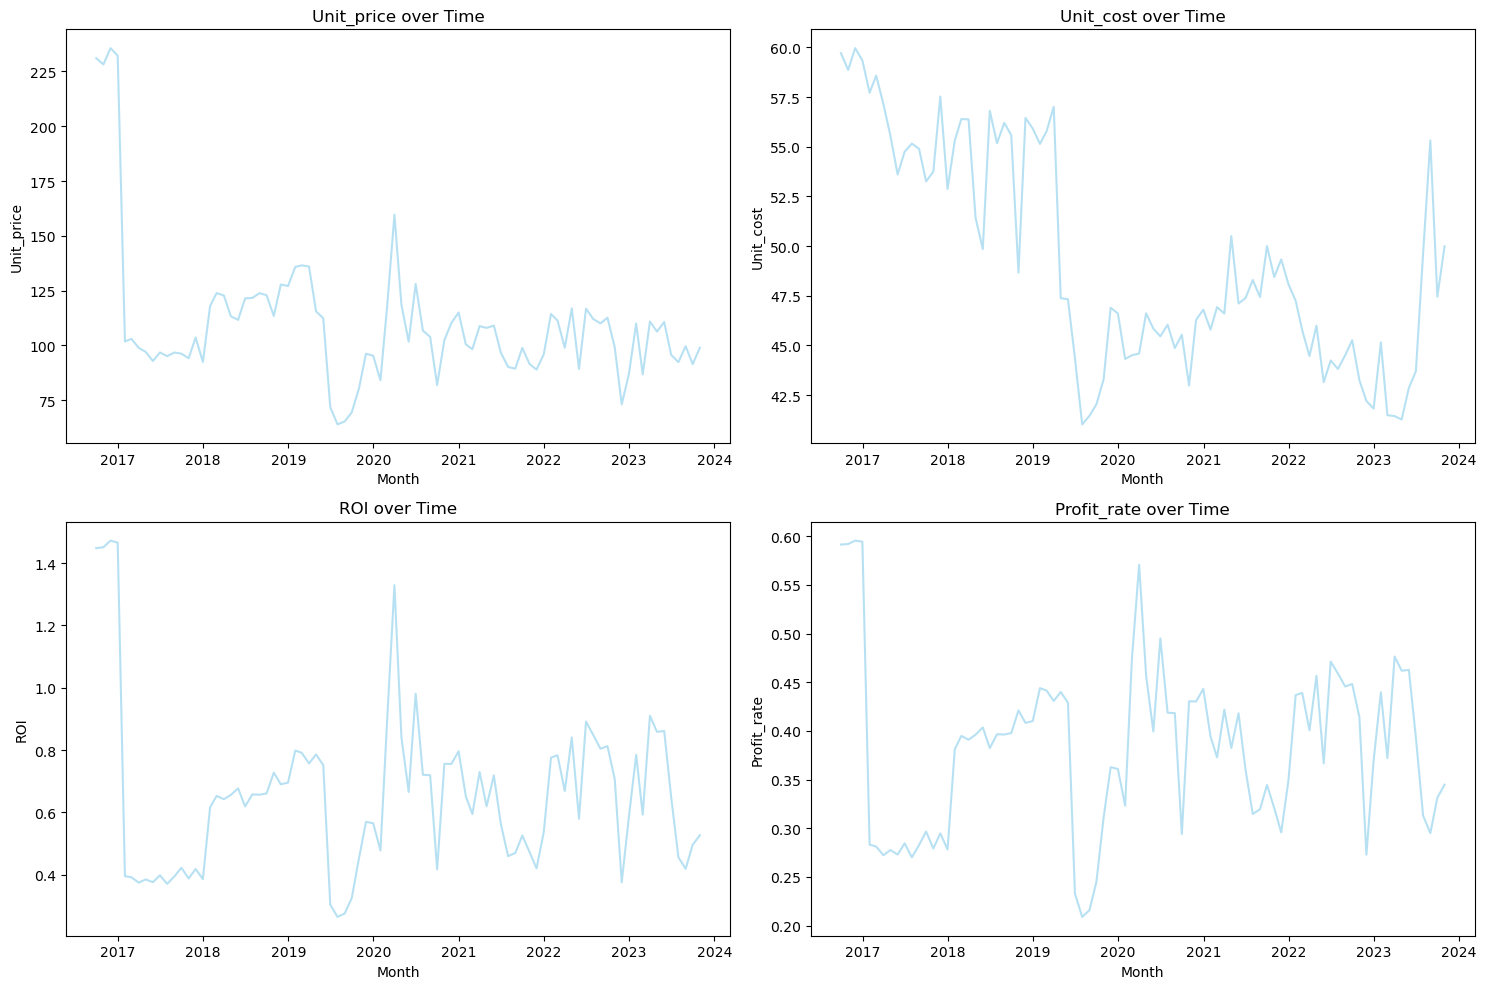

In [19]:
# Creating subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot bar charts for each feature in separate subplots, using 'Month' as x-axis
for idx, column in enumerate(df_cor_features.columns):
    axes[idx].plot(df_cor_features[column],color='skyblue', alpha = 0.6)
    axes[idx].set_ylabel(column)
    axes[idx].set_xlabel('Month')
    axes[idx].set_title(f'{column} over Time')
    
    

# Final adjustments to layout
plt.tight_layout()
plt.show()

In [21]:
 # 去掉前四个值作为离群点
df_cor_features = df_cor_features[4:]
df_cor_features

,Unit_price,Unit_cost,ROI,Profit_rate
2017-01-31,101.821270,57.716305,0.395013,0.283161
2017-02-28,103.004670,58.578907,0.391398,0.281299
2017-03-31,98.940003,57.152753,0.374286,0.272349
2017-04-30,97.088720,55.565122,0.384442,0.277687
2017-05-31,92.903957,53.599067,0.375649,0.273070
...,...,...,...,...
2023-06-30,95.717707,43.700867,0.648642,0.393440
2023-07-31,92.408766,49.626801,0.455529,0.312964
2023-08-31,99.675908,55.315655,0.418530,0.295045
2023-09-30,91.487771,47.451899,0.495508,0.331331


In [23]:
df_differenced = df_cor_features.diff().dropna()
df_differenced

,Unit_price,Unit_cost,ROI,Profit_rate
2017-02-28,1.183400,0.862602,-0.003614,-0.001862
2017-03-31,-4.064667,-1.426154,-0.017112,-0.008949
2017-04-30,-1.851283,-1.587631,0.010156,0.005338
2017-05-31,-4.184763,-1.966056,-0.008793,-0.004617
2017-06-30,3.912644,1.148393,0.022022,0.011454
...,...,...,...,...
2023-06-30,-14.948049,0.838755,-0.212476,-0.069248
2023-07-31,-3.308941,5.925934,-0.193113,-0.080476
2023-08-31,7.267142,5.688854,-0.036999,-0.017919
2023-09-30,-8.188137,-7.863755,0.076978,0.036286
